In [1]:
!pip install matplotlib
!pip install seaborn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("housing.csv")

In [4]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
data.dropna(inplace = True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [8]:
# !pip install scikit-learn
from sklearn.model_selection import train_test_split
X = data.drop(['median_house_value'], axis = 1)
Y = data['median_house_value']

In [9]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [10]:
Y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [11]:
data.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [13]:
train_data = X_train.join(Y_train)

In [14]:
print(train_data)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
20193    -119.21     34.26                10.0       3150.0           781.0   
6872     -118.09     34.07                38.0       1036.0           226.0   
8814     -118.33     33.77                33.0       4244.0           595.0   
1145     -121.39     39.61                22.0       2828.0           610.0   
1759     -122.33     37.94                47.0       1882.0           361.0   
...          ...       ...                 ...          ...             ...   
12066    -117.56     33.83                28.0        895.0           127.0   
1839     -122.29     37.92                36.0       1450.0           235.0   
7748     -118.14     33.92                35.0       2378.0           559.0   
5159     -118.28     33.96                39.0        882.0           221.0   
4254     -118.35     34.10                16.0       2930.0          1038.0   

       population  households  median_income ocean_

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

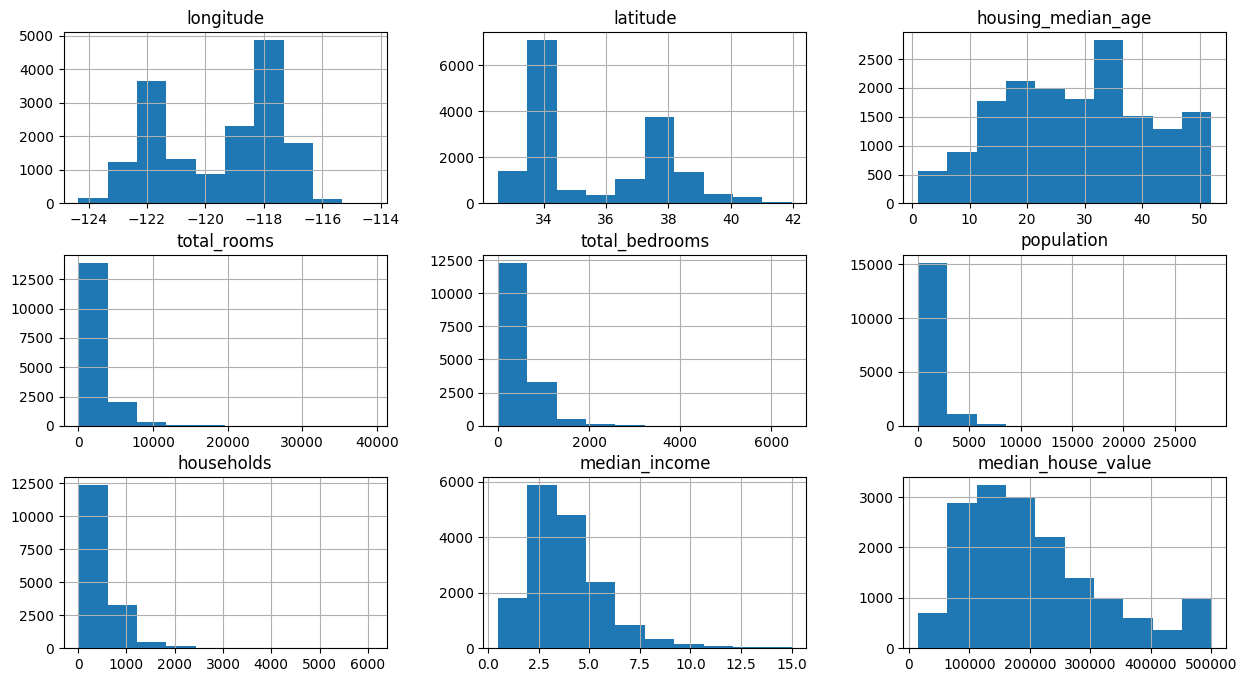

In [15]:
train_data.hist(figsize=(15, 8))

<Axes: >

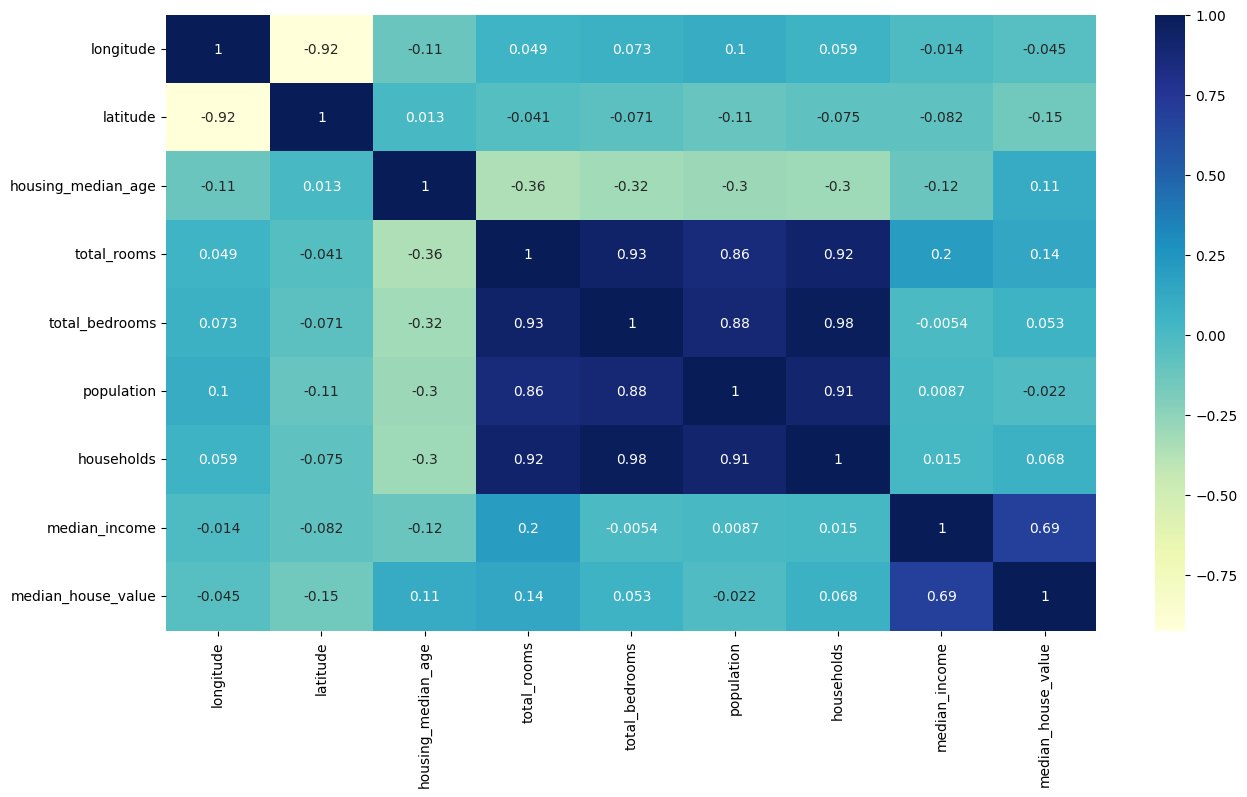

In [16]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.select_dtypes(include=['int64','float64']).corr(), annot=True, cmap="YlGnBu")

In [17]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

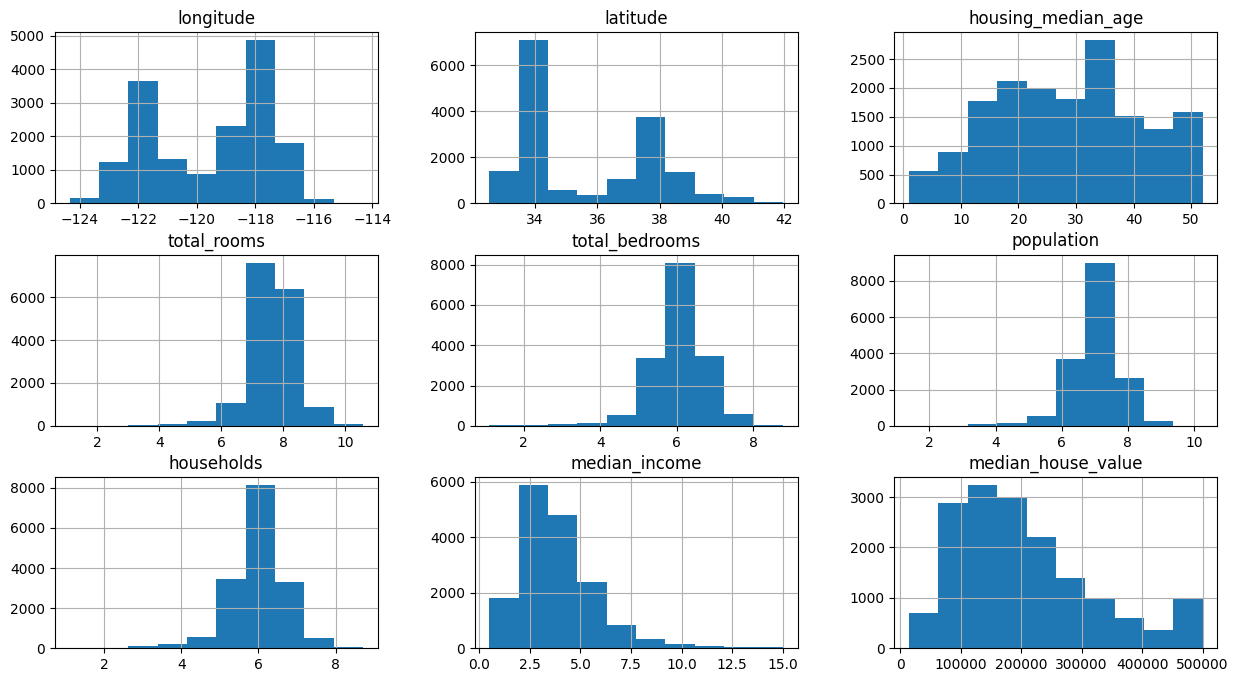

In [18]:
train_data.hist(figsize=(15,8))

In [19]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [20]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
20193,-119.21,34.26,10.0,8.055475,6.661855,7.367077,6.483107,4.2448,157300.0,False,False,False,False,True
6872,-118.09,34.07,38.0,6.944087,5.424950,6.965080,5.463832,3.2578,184200.0,True,False,False,False,False
8814,-118.33,33.77,33.0,8.353497,6.390241,7.336286,6.324359,9.8214,500001.0,False,False,False,False,True
1145,-121.39,39.61,22.0,7.947679,6.415097,6.894670,5.971262,2.8871,94700.0,False,True,False,False,False
1759,-122.33,37.94,47.0,7.540622,5.891644,6.682109,5.837730,3.5848,140800.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12066,-117.56,33.83,28.0,6.797940,4.852030,5.849325,4.753590,5.4788,339300.0,False,True,False,False,False
1839,-122.29,37.92,36.0,7.280008,5.463832,6.343880,5.459586,6.0000,311400.0,False,False,False,True,False
7748,-118.14,33.92,35.0,7.774436,6.327937,7.495542,6.304449,3.9327,190500.0,True,False,False,False,False
5159,-118.28,33.96,39.0,6.783325,5.402677,6.548219,5.247024,1.8472,99100.0,True,False,False,False,False


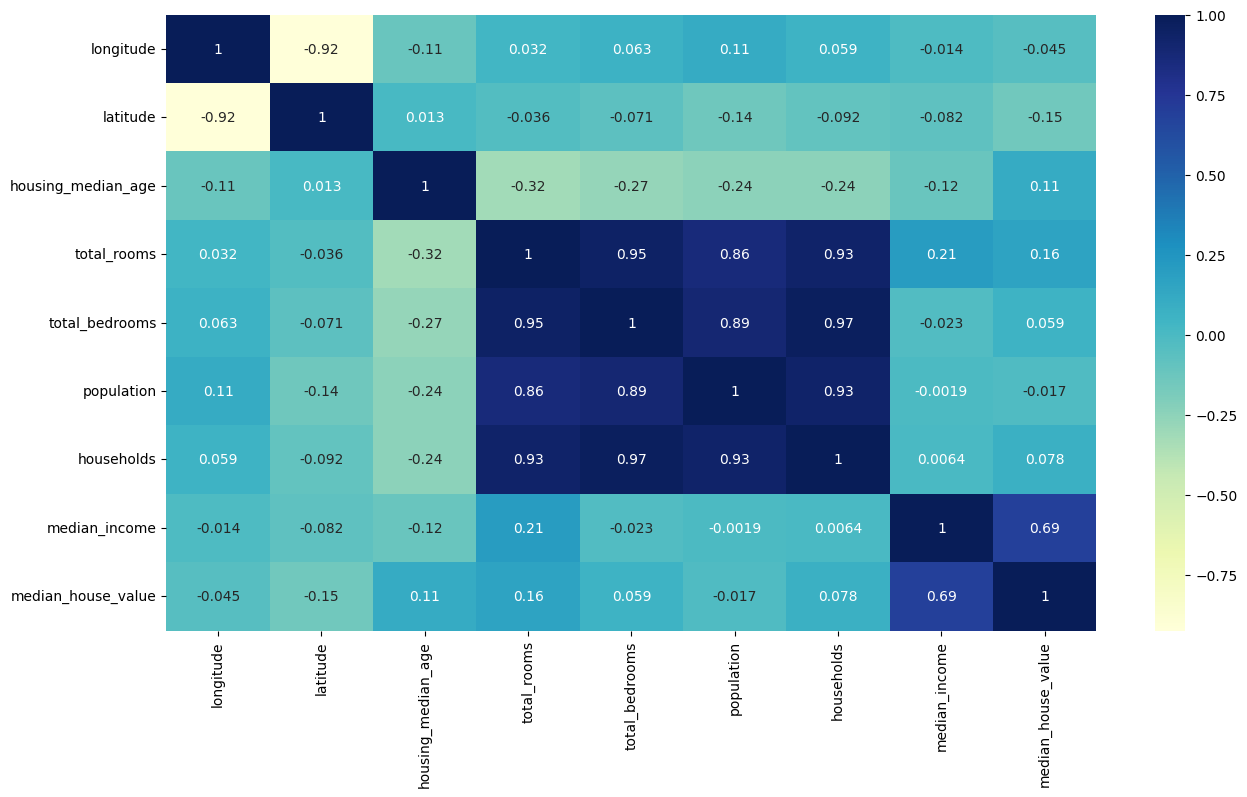

In [21]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.select_dtypes(include=['int64','float64']).corr(), annot=True, cmap="YlGnBu")
plt.show()

<Axes: xlabel='latitude', ylabel='longitude'>

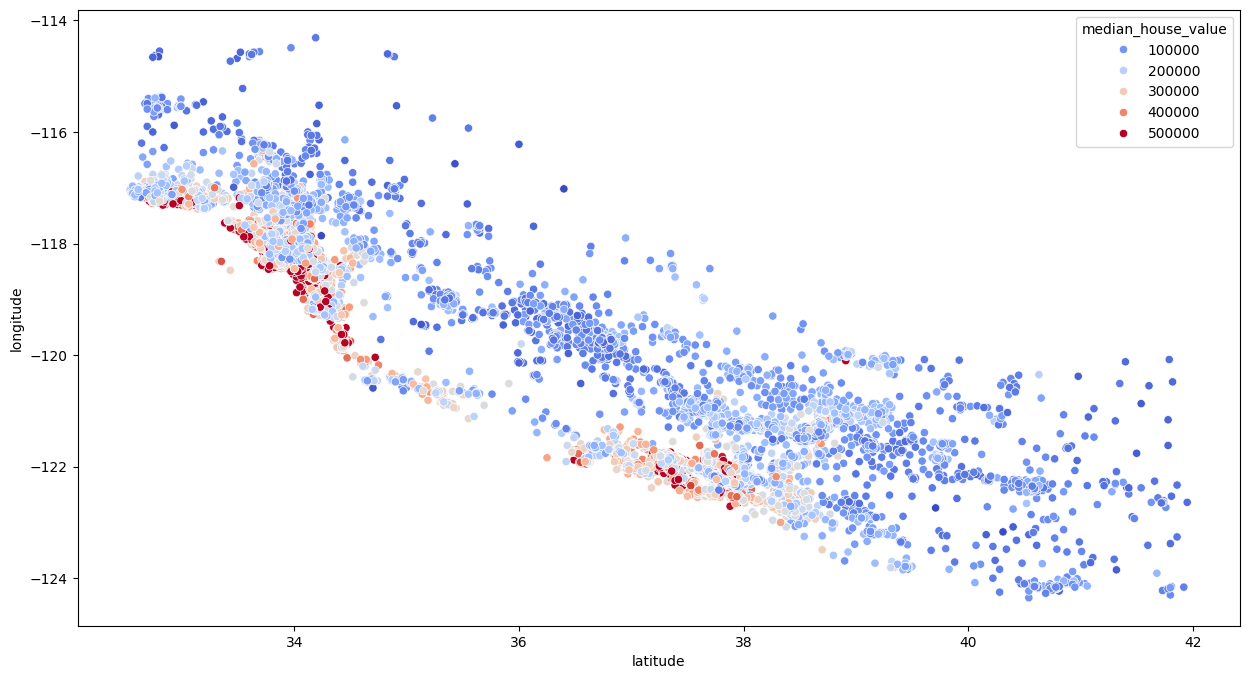

In [22]:
# Red = most expensive
# Blue = less expensive
plt.figure(figsize=(15, 8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm")

In [23]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms'] 
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

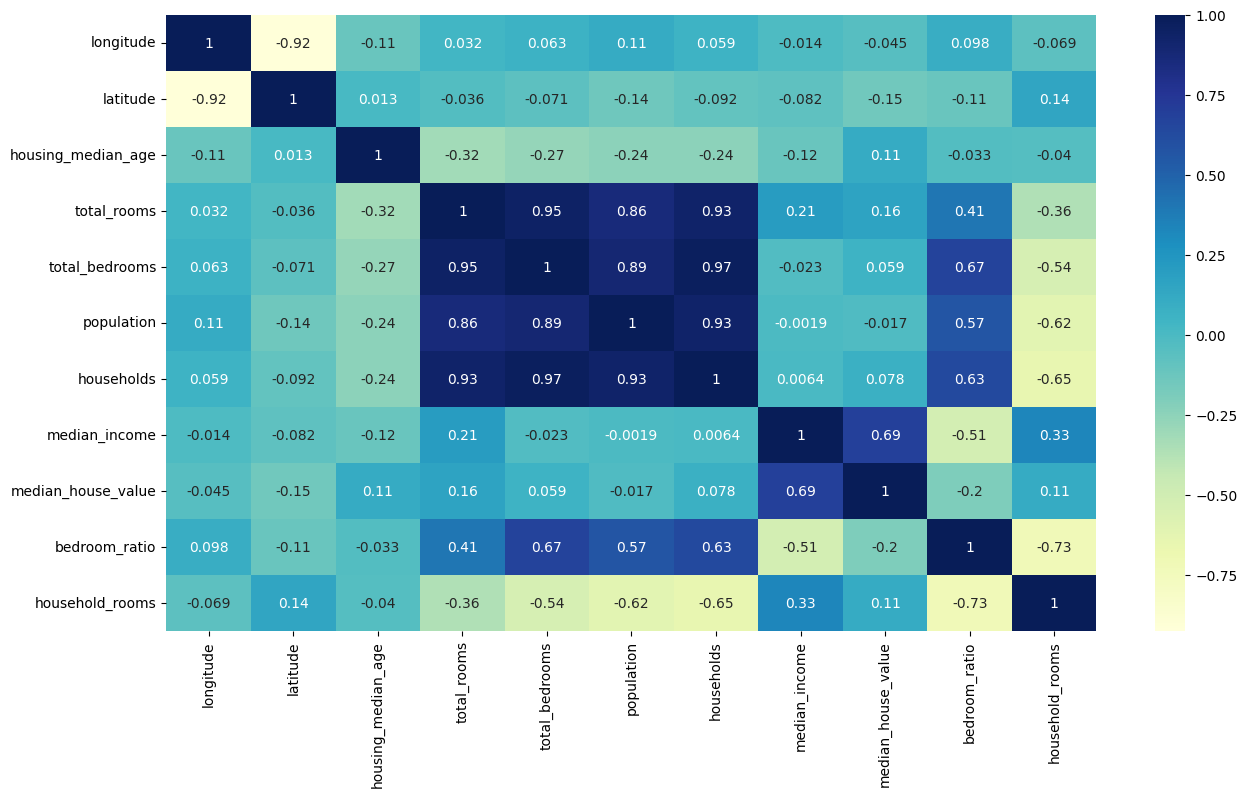

In [24]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.select_dtypes(include=['int64', 'float64']).corr(), annot=True, cmap="YlGnBu")
plt.show()

In [25]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
20193,-119.21,34.26,10.0,8.055475,6.661855,7.367077,6.483107,4.2448,157300.0,False,False,False,False,True,0.826997,1.242533
6872,-118.09,34.07,38.0,6.944087,5.424950,6.965080,5.463832,3.2578,184200.0,True,False,False,False,False,0.781233,1.270919
8814,-118.33,33.77,33.0,8.353497,6.390241,7.336286,6.324359,9.8214,500001.0,False,False,False,False,True,0.764978,1.320845
1145,-121.39,39.61,22.0,7.947679,6.415097,6.894670,5.971262,2.8871,94700.0,False,True,False,False,False,0.807166,1.330988
1759,-122.33,37.94,47.0,7.540622,5.891644,6.682109,5.837730,3.5848,140800.0,False,False,False,True,False,0.781321,1.291704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12066,-117.56,33.83,28.0,6.797940,4.852030,5.849325,4.753590,5.4788,339300.0,False,True,False,False,False,0.713750,1.430064
1839,-122.29,37.92,36.0,7.280008,5.463832,6.343880,5.459586,6.0000,311400.0,False,False,False,True,False,0.750525,1.333436
7748,-118.14,33.92,35.0,7.774436,6.327937,7.495542,6.304449,3.9327,190500.0,True,False,False,False,False,0.813942,1.233167
5159,-118.28,33.96,39.0,6.783325,5.402677,6.548219,5.247024,1.8472,99100.0,True,False,False,False,False,0.796464,1.292795


In [26]:
from sklearn.linear_model import LinearRegression
X_train, Y_train = train_data.drop(['median_house_value'], axis = 1), train_data['median_house_value']
reg = LinearRegression()
reg.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False
